In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris_data.csv", header = None)
df.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']

In [3]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.replace({'Iris-setosa':1,'Iris-versicolor':2, 'Iris-virginica':3},inplace=True)

In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [6]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
species=df["Species"].tolist()

In [8]:
X=df.iloc[:,0:4]
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [10]:
X_co=(1/50)*X.T.dot(X)
X_co

array([[ 3.        , -0.32810775,  2.61526247,  2.4538609 ],
       [-0.32810775,  3.        , -1.26154829, -1.06963227],
       [ 2.61526247, -1.26154829,  3.        ,  2.88827129],
       [ 2.4538609 , -1.06963227,  2.88827129,  3.        ]])

In [11]:
eig_vectors,eig_values,v=np.linalg.svd(X_co)
eig_values

array([8.73245425, 2.76366279, 0.44205983, 0.06182312])

In [12]:
eig_vectors

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [13]:
total=sum(eig_values)

In [14]:
variance_of_each_feature=(eig_values/total)*100
print("Variance of each feature-->",variance_of_each_feature)

Variance of each feature--> [72.77045209 23.03052327  3.68383196  0.51519268]


Text(0.5, 0, 'Dimensions')

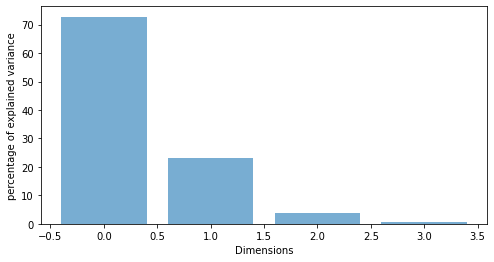

In [15]:
plt.figure(figsize=(8,4))
plt.bar(range(4),variance_of_each_feature,alpha=0.6)
plt.ylabel('percentage of explained variance')
plt.xlabel('Dimensions')

In [16]:
pc1=X.dot(eig_vectors[:,0])
pc2=X.dot(eig_vectors[:,1])
res=pd.DataFrame(pc1,columns=["pc1"])
res["pc2"]=pc2
res['target']=species
res.head()

,pc1,pc2,target
0,2.264542,-0.505704,1
1,2.086426,0.655405,1
2,2.367950,0.318477,1
3,2.304197,0.575368,1
4,2.388777,-0.674767,1


<Figure size 432x288 with 0 Axes>

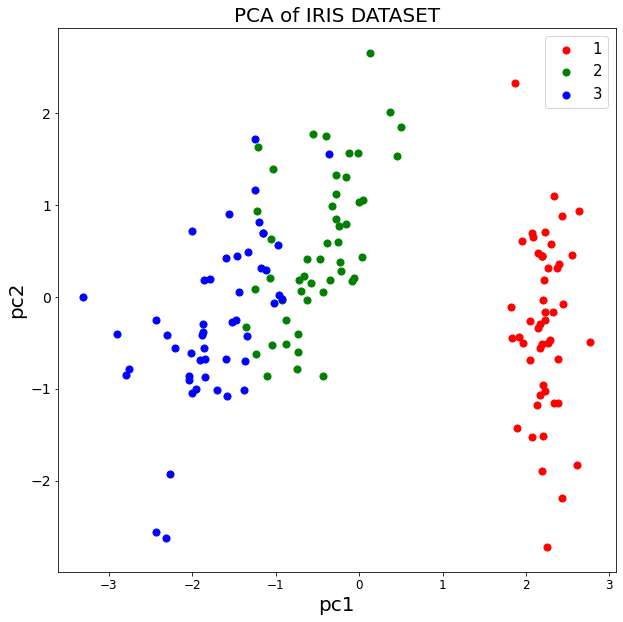

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('pc1',fontsize=20)
plt.ylabel('pc2',fontsize=20)
plt.title("PCA of IRIS DATASET",fontsize=20)
targets=[1,2,3]
colors=['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep=res['target'] == target
    plt.scatter(res.loc[indicesToKeep,'pc1'],res.loc[indicesToKeep,'pc2'],c=color,s=50)
    
plt.legend(targets,prop={'size':15})
plt.show()